<a href="https://colab.research.google.com/github/NicobaudinoQ/Aprendizaje-Profundo/blob/Nico/IAP_TP1_G7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TRABAJO PRÁCTICO I (Media Materia)**
Dado el dataset que busca predecir la [presencia o ausencia de Diabetes](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv). Se pide:


1. Realizar una pequeña inspeccion del dataset que busque entender de qué se trata el dataset y el problema a resolver. La idea es inspecionar no realizar un EDA completo, pueden valerse de herramientas que simplifiquen o realicen esta tarea.

2. Implementar una red neuronal simple con parametros por defaults (este será su baseline).

3. En una siguiente instancia realizar una busqueda de hiperparametros buscando mejorar el baseline.

4. Mostrar e Interpretar los resultados.

#### ACLARACIONES IMPORTANTES:

1. Pueden probar todo lo que gusten pero deben mostrar como máximo 3 implementaciones distintas.

2. La notebook a presentar debe ser legible incluyendo

    1. Introduccion

    2. Acompañar con comentarios que aporten a la interpretacion de los resultados.

    3. Una conclusion (breve pero no tan breve) con un resumen de lo trabajado y los resultados mas representativos de acuerdo a su interpretacion

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Intenta cargar el archivo desde una URL
url = 'https://raw.githubusercontent.com/NicobaudinoQ/Aprendizaje-Profundo/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
try:
    df = pd.read_csv(url)
except FileNotFoundError:
    try:
        # Intenta montar Google Drive
        drive.mount('/content/drive')
        ruta_al_archivo = '/content/drive/My Drive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
        df = pd.read_csv(ruta_al_archivo)
    except FileNotFoundError:
        # Si el archivo no se encuentra en Google Drive, intenta cargarlo desde la computadora local
        uploaded_files = files.upload()
        df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')


df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
#df = pd.read_csv('https://raw.githubusercontent.com/NicobaudinoQ/Aprendizaje-Profundo/main/diabetes_012_health_indicators_BRFSS2015.csv'
#'https://raw.githubusercontent.com/NicobaudinoQ/Aprendizaje-Profundo/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
#'https://raw.githubusercontent.com/NicobaudinoQ/Aprendizaje-Profundo/main/diabetes_binary_health_indicators_BRFSS2015.csv'

### 1. Exploración del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
df.shape

(70692, 22)

<Axes: >

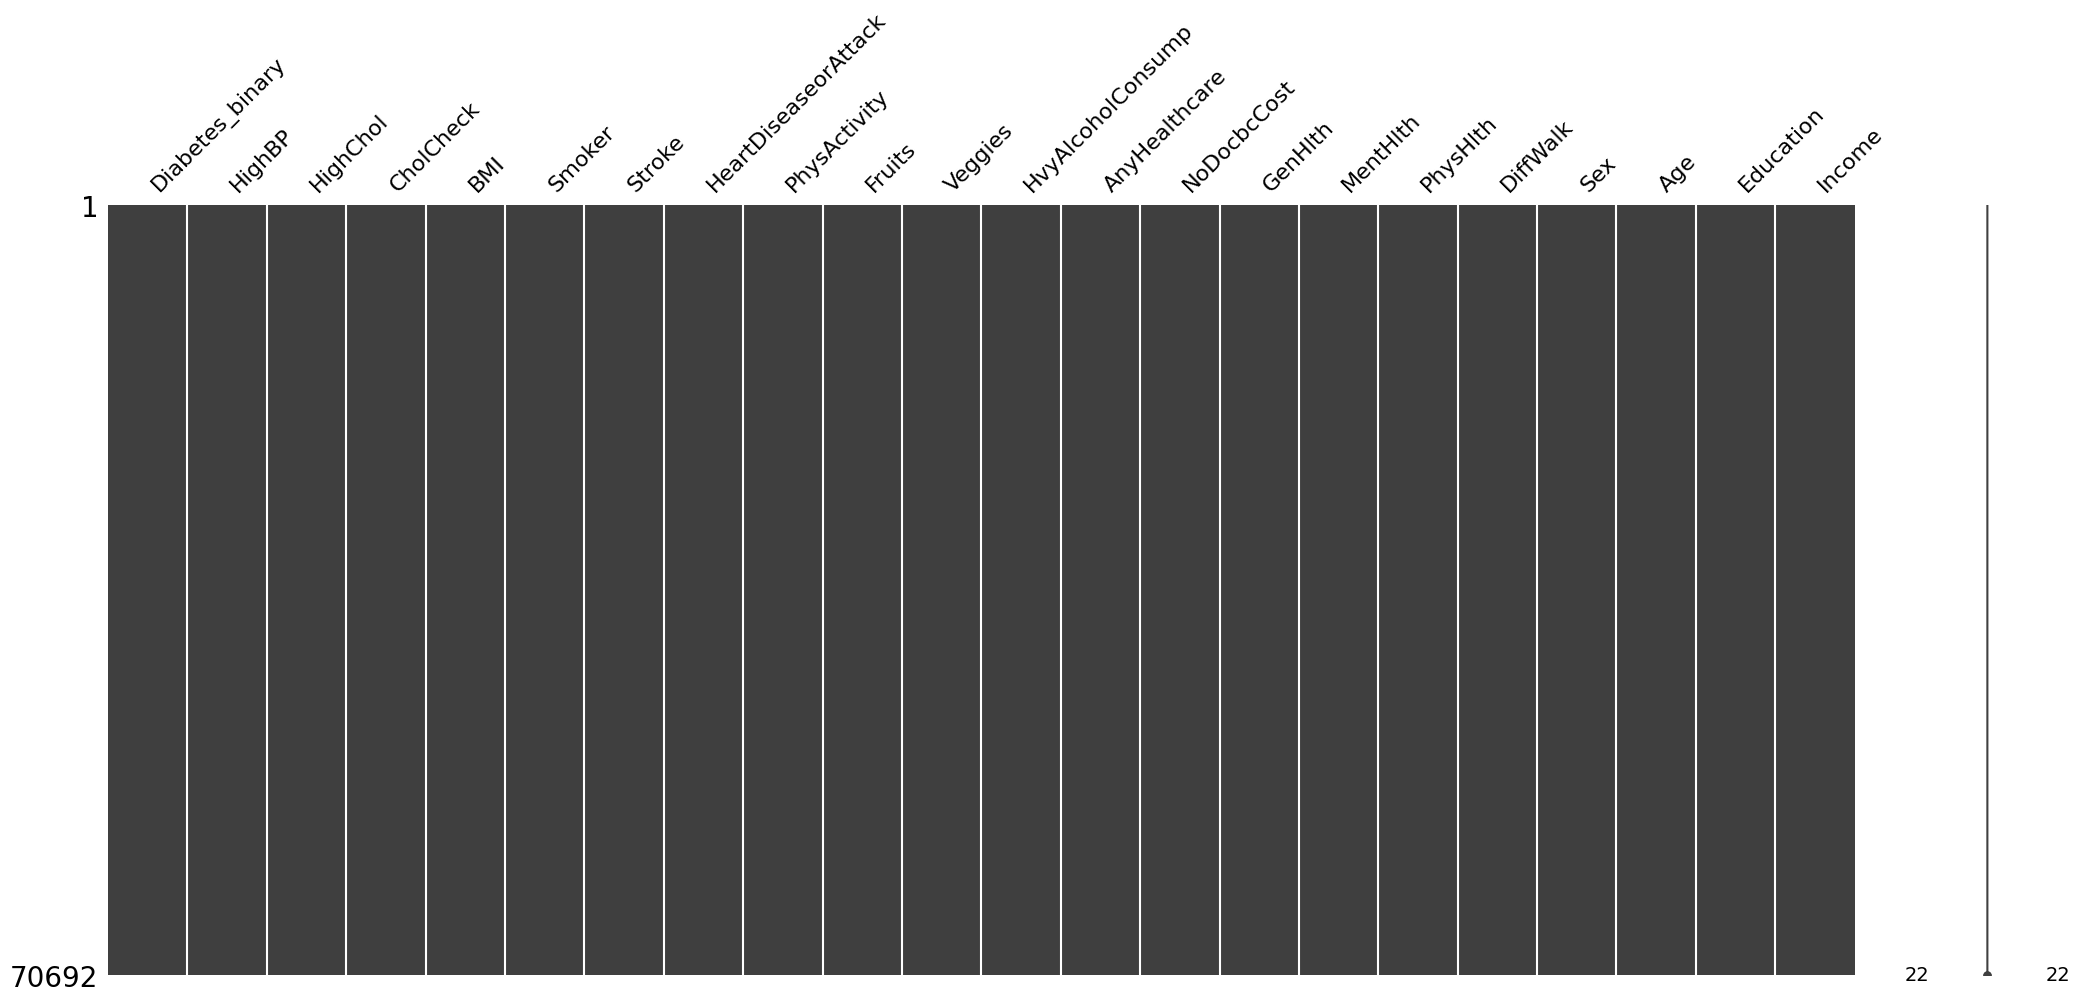

In [ ]:
msno.matrix(df)


No se observa la presencia de valores nulos en ningun atributo.

Analicemos nuestra variable target 'Diabetes_binary'

In [ ]:
df['Diabetes_binary'].unique()

array([0., 1.])

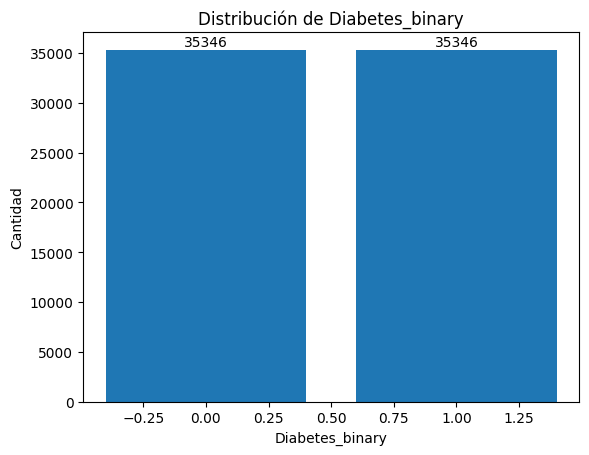

In [ ]:
# Contar la cantidad de 0 y 1 en la columna 'Diabetes_binary'
conteo = df['Diabetes_binary'].value_counts()

# Crear el gráfico de barras
plt.bar(conteo.index, conteo.values)

plt.xlabel('Diabetes_binary')
plt.ylabel('Cantidad')
plt.title('Distribución de Diabetes_binary')

for i, v in enumerate(conteo.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


Las clases están balanceadas. Esto nos permitirá evaluar los modelos utilizando el accuracy como métrica.

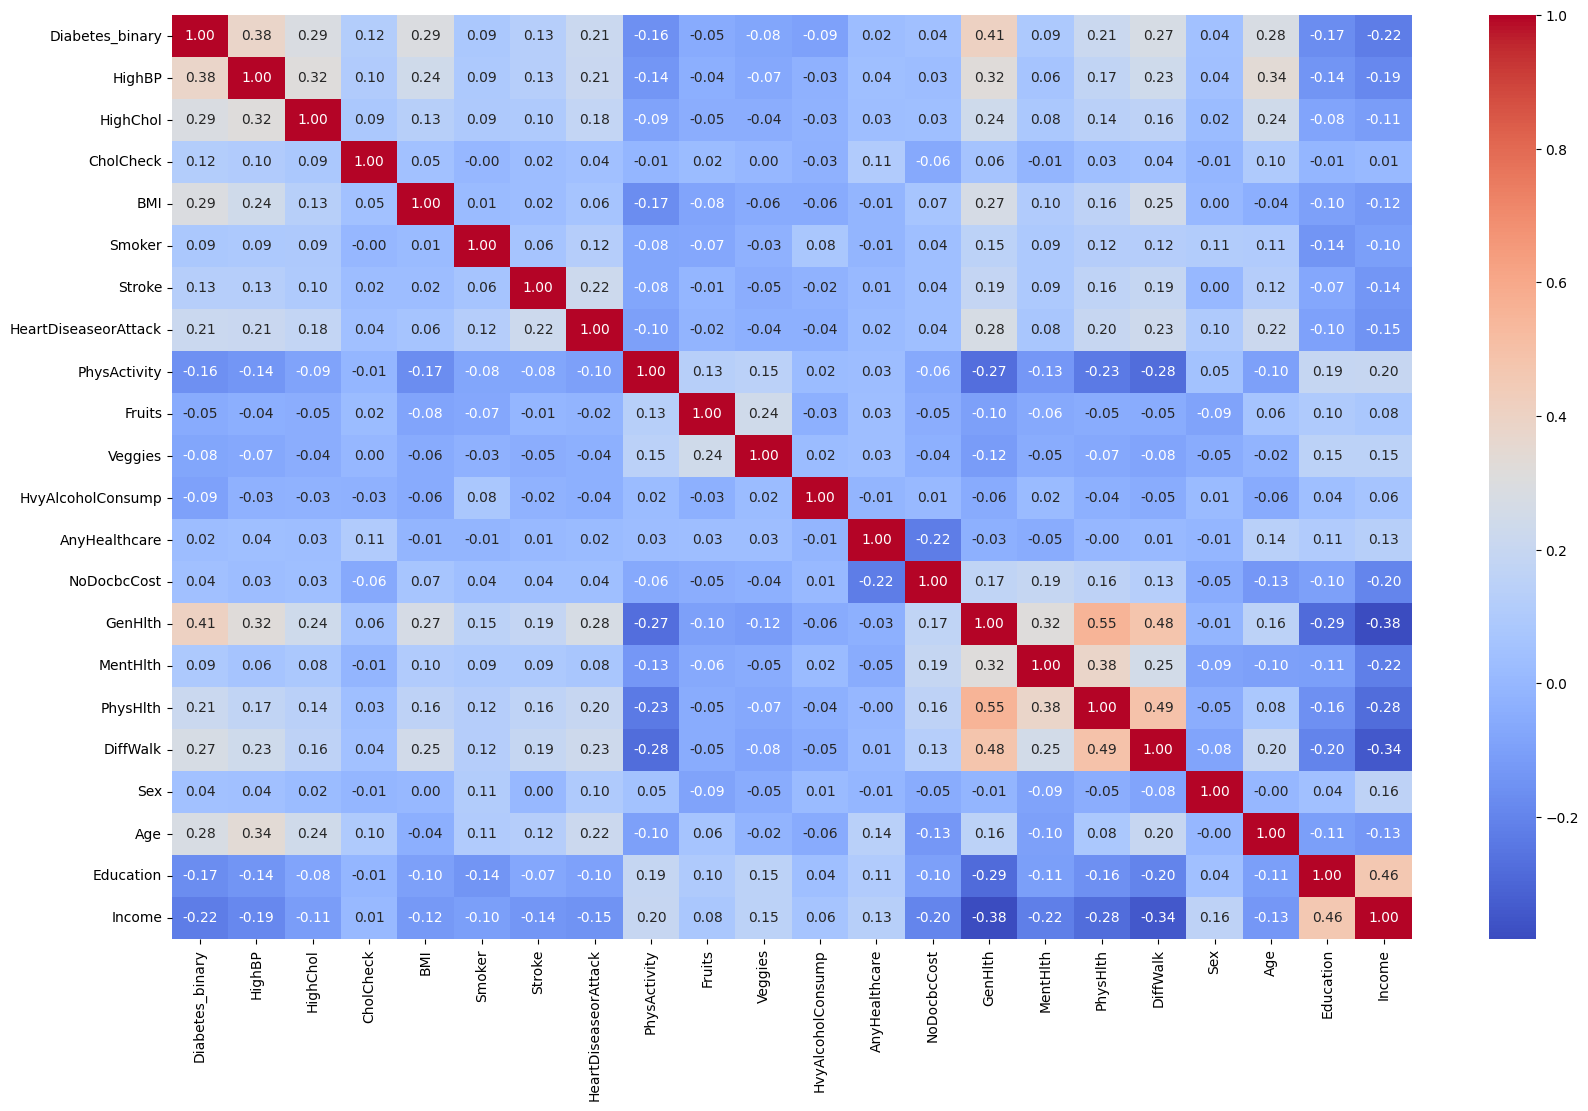

In [ ]:
#evaluamos la correlacion entre atributos
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()

Correlaciones notables:

Positivas: GenHlth, highBP, BMI, highchol, age.

Negativas: Income, Education, PhysActivity.


## 2. Implementar una red neuronal simple con parametros por defaults

Seguiremos los lineamientos de las notebooks de clase para entrenar nuestro dataset de diabetes.

In [ ]:
# Separar X e y
X = df.drop('Diabetes_binary', axis=1).values
y = df['Diabetes_binary'].values

In [ ]:
# Dividimos el conjunto de datos en conjuntos de entrenamiento, validación y test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Convertimos los datos en tensores de PyTorch
X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)

X_val = torch.Tensor(X_val)
y_val = torch.LongTensor(y_val)

X_test = torch.Tensor(X_test)
y_test = torch.LongTensor(y_test)

In [ ]:
# Definimos el modelo de la red neuronal
class MyDiabetesPredictionModel(nn.Module):
    def __init__(self,
                 input_features= 21,  # Cantidad de características de entrada
                 hidden_layer_1= 8,  # Cantidad de neuronas de la primera capa oculta
                 hidden_layer_2= 9,  # Cantidad de neuronas de la segunda capa oculta
                 output_features= 2  # Dimensión de la salida: 2 clases (0 o 1)
                 ):
        super().__init__()  # Llama al método __init__ de la clase nn.Module
        # Generamos una red con 3 capas lineales (la última es de salida)
        self.fully_connected_1 = nn.Linear(input_features, hidden_layer_1)
        self.fully_connected_2 = nn.Linear(hidden_layer_1, hidden_layer_2)
        self.output = nn.Linear(hidden_layer_2, output_features)

    # Foward pass
    def forward(self, x):
        x = F.relu(self.fully_connected_1(x))
        x = F.relu(self.fully_connected_2(x))
        x = self.output(x)
        return x


In [ ]:
# Semilla aleatoria
torch.manual_seed(42)

model = MyDiabetesPredictionModel()  # Instanciamos la clase

# En el caso de nn.CrossEntropyLoss(), la función softmax ya está implícita en PyTorch
criterion = nn.CrossEntropyLoss()  # Función de pérdida para problemas de clasificación binaria

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Número de épocas de entrenamiento
epochs = 100

train_losses = []
val_losses = []

for epoch in tqdm(range(epochs)):
    # Foward pass y obtener la predicción
    y_pred = model.forward(X_train)

    # Calcula la pérdida de cada época
    loss_train = criterion(y_pred, y_train)
    train_losses.append(loss_train.item())

    # Imprime los resultados de las épocas seleccionadas
    if epoch % 10 == 0:
        print(f'Época: {epoch}  Pérdida: {loss_train.item()}')

    # Setea todos los gradientes en cero, sino se acumulan
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()  # Actualiza todos los parámetros del modelo (pesos y sesgos)

    with torch.no_grad():
        # Foward pass y obtener la predicción
        y_pred_val = model.forward(X_val)

        # Calcula la pérdida en el conjunto de validación
        loss_val = criterion(y_pred_val, y_val)
        val_losses.append(loss_val.item())



  1%|          | 1/100 [00:00<00:22,  4.38it/s]

Época: 0  Pérdida: 0.6906571388244629


 13%|█▎        | 13/100 [00:01<00:06, 13.05it/s]

Época: 10  Pérdida: 0.6294757723808289


 21%|██        | 21/100 [00:01<00:05, 13.67it/s]

Época: 20  Pérdida: 0.5700723528862


 33%|███▎      | 33/100 [00:02<00:04, 14.17it/s]

Época: 30  Pérdida: 0.5389083027839661


 41%|████      | 41/100 [00:03<00:04, 14.54it/s]

Época: 40  Pérdida: 0.5277690291404724


 52%|█████▏    | 52/100 [00:03<00:03, 14.18it/s]

Época: 50  Pérdida: 0.5215988159179688


 62%|██████▏   | 62/100 [00:04<00:02, 16.52it/s]

Época: 60  Pérdida: 0.5191683173179626


 72%|███████▏  | 72/100 [00:05<00:02, 12.37it/s]

Época: 70  Pérdida: 0.5168302059173584


 82%|████████▏ | 82/100 [00:06<00:01, 13.15it/s]

Época: 80  Pérdida: 0.515598475933075


 96%|█████████▌| 96/100 [00:06<00:00, 22.87it/s]

Época: 90  Pérdida: 0.514553427696228


100%|██████████| 100/100 [00:06<00:00, 14.61it/s]


Utilizaremos el accuracy y la función de pérdida como métricas para evaluar nuestro modelo.

En general, se busca minimizar la función de pérdida y maximizar la presicion durante el entrenamiento para lograr un rendimiento óptimo del modelo.

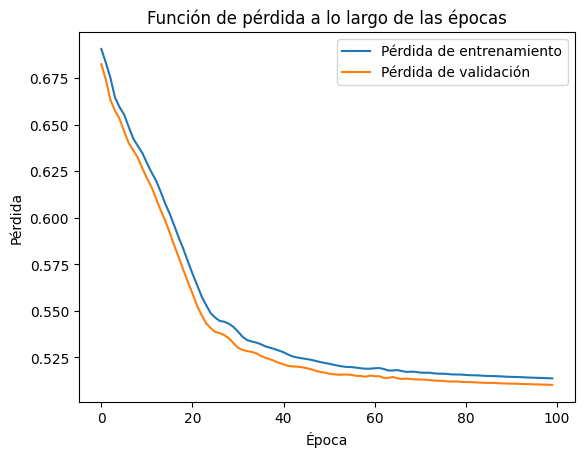

In [ ]:
# Grafica las curvas de pérdida
plt.title('Función de pérdida a lo largo de las épocas')
plt.plot(train_losses, label='Pérdida de entrenamiento')
plt.plot(val_losses, label='Pérdida de validación')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()
plt.show()

Como podemos ver en el gráfico anterior, tanto el conjunto de entrenamiento como el de validación muestran una convergencia de la función de pérdida a un valor cercano a 0.5 a medida que aumenta el número de épocas. Esto podría indicarnos problemas en el proceso de entrenamiento o en la elección del modelo, como falta de capacidad, problemas de regularización o dificultades inherentes en los datos.

No obstante, podemos destacar que ambos conjutos convergen a un valor similar y muestran curvas semejantes. Esto nos indicaría que el modelo no está sobreajustando, ya que también generaliza bien para el conjunto de validación.

Por lo tanto, aunque el valor de pérdida alcanzado puede no ser el ideal, la consistencia entre ambos conjuntos sugiere una capacidad razonable de generalización.

Finalmente, considaramos importante considerar un ajuste de hiperparámetros para mejorar el rendimiento del modelo.

In [ ]:
# Evalua el modelo en el conjunto de prueba
with torch.no_grad():
    y_pred_test = model.forward(X_test)  # Hacer inferencia en el conjunto de prueba
    loss_test = criterion(y_pred_test, y_test)

print(f'Valor de pérdida en el conjunto de prueba: {loss_test.item():2f}')

Valor de pérdida en el conjunto de prueba: 0.513013


In [ ]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_val):
        y_pred = model.forward(data)

        if y_pred.argmax().item() == y_val[i]:
            correct += 1
print(f'\n{correct} out of {len(y_val)} = {100*correct/len(y_val):.2f}% correct')


7980 out of 10604 = 75.25% correct


In [ ]:
# Genera el informe de clasificación
report = classification_report(y_test, y_pred_test.argmax(axis=1))

# Calcula la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_test.argmax(axis=1))

print(report)
print('-------------------------')
print('Matriz de Confusión:')
print(confusion)


              precision    recall  f1-score   support

           0       0.77      0.69      0.73      5289
           1       0.72      0.80      0.76      5315

    accuracy                           0.74     10604
   macro avg       0.75      0.74      0.74     10604
weighted avg       0.75      0.74      0.74     10604

-------------------------
Matriz de Confusión:
[[3634 1655]
 [1057 4258]]


Además de los resultados anteriores, por un lado se entrenó el modelo seleccionando las variables más correlacionadas con la variable target y, por el otro, estandarizando los features de todo el dataset. En ambos casos, los resultados de las métricas obtenidas fueron semejantes a las mostradas anteriormente.

## 3. En una siguiente instancia realizar una busqueda de hiperparametros buscando mejorar el baseline.

A continuación, ajustaremos los hiperparámetros del modelo base para buscar mejorar la performance del modelo base.

### Número de capas

El número de capas en una red neuronal afecta su capacidad para aprender y representar datos. Aumentar las capas permite aprender patrones más complejos, lo que a menudo mejora el rendimiento inicial. Sin embargo, agregar demasiadas capas puede causar problemas de sobreajuste, reduciendo la capacidad de la red para generalizar en nuevos datos. Por lo tanto, al variar el número de capas, buscaremos un equilibrio para obtener un rendimiento óptimo sin sobreajuste.

In [ ]:
# Dispositivo para entrenar (GPU si está disponible, de lo contrario CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Define la función get_accuracy para calcular la precisión
def get_accuracy(y_true, y_pred):
    correct = (y_pred == y_true).sum().item()
    total = y_true.size(0)
    accuracy = correct / total
    return accuracy

# Define la clase SimpleMLP
class SimpleMLP(nn.Module):
    def __init__(self, n_inputs, n_outputs, n_hidden, activation_function):
        super(SimpleMLP, self).__init__()
        self.hidden_layer1 = nn.Linear(n_inputs, n_hidden)
        self.output_layer = nn.Linear(n_hidden, n_outputs)
        self.activation_function = activation_function

    def forward(self, x):
        x = self.activation_function(self.hidden_layer1(x))
        x = self.output_layer(x)
        return x

# Define la clase BigMLP
class BigMLP(nn.Module):
    def __init__(self, n_inputs, n_outputs, n_hidden, activation_function):
        super(BigMLP, self).__init__()
        self.hidden_layer1 = nn.Linear(n_inputs, n_hidden*2)
        self.hidden_layer2 = nn.Linear(n_hidden*2, n_hidden*4)
        self.hidden_layer3 = nn.Linear(n_hidden*4, n_hidden*8)
        self.hidden_layer4 = nn.Linear(n_hidden*8, n_hidden)
        self.output_layer = nn.Linear(n_hidden, n_outputs)
        self.activation_function = activation_function

    def forward(self, x):
        x = self.activation_function(self.hidden_layer1(x))
        x = self.activation_function(self.hidden_layer2(x))
        x = self.activation_function(self.hidden_layer3(x))
        x = self.activation_function(self.hidden_layer4(x))
        x = self.output_layer(x)
        return x


In [ ]:
# Define los hiperparámetros
n_inputs = X_train.shape[1]
n_outputs = 2
n_hidden = 128
lr = 0.01
epochs = 100
activation_function = nn.ReLU()


In [ ]:
# Convierte los datos de entrenamiento y validación en tensores de PyTorch
X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)

X_val = torch.Tensor(X_val)
y_val = torch.LongTensor(y_val)

X_test = torch.Tensor(X_test)
y_test = torch.LongTensor(y_test)

In [ ]:
# Crea instancias de los modelos
simple_mlp_model = SimpleMLP(n_inputs, n_outputs, n_hidden, activation_function)
big_mlp_model = BigMLP(n_inputs, n_outputs, n_hidden, activation_function)

# Define el optimizador y la función de pérdida
optimizer = optim.SGD(simple_mlp_model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

In [ ]:
# Entrena y evalúa el modelo SimpleMLP
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = simple_mlp_model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

# Realiza inferencia en el conjunto de validación
with torch.no_grad():
    val_preds_simple_mlp = simple_mlp_model(X_val)
accuracy_simple_mlp = get_accuracy(y_val, torch.argmax(val_preds_simple_mlp, dim=1))

# Define un optimizador para el modelo BigMLP
optimizer = optim.SGD(big_mlp_model.parameters(), lr=lr)

# Entrena y evalúa el modelo BigMLP
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = big_mlp_model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

# Realiza inferencia en el conjunto de validación
with torch.no_grad():
    val_preds_big_mlp = big_mlp_model(X_val)
accuracy_big_mlp = get_accuracy(y_val, torch.argmax(val_preds_big_mlp, dim=1))

print(f'Accuracy del modelo SimpleMLP en el conjunto de validación: {accuracy_simple_mlp:.4f}')
print(f'Accuracy del modelo BigMLP en el conjunto de validación: {accuracy_big_mlp:.4f}')

Accuracy del modelo SimpleMLP en el conjunto de validación: 0.6736
Accuracy del modelo BigMLP en el conjunto de validación: 0.6713


### Taza de aprendizaje y cantidad de neuronas por capa

La tasa de aprendizaje en una red neuronal controla qué tan rápido la red ajusta sus pesos en respuesta a los datos de entrenamiento. Una tasa de aprendizaje alta puede hacer que la red converja rápidamente, pero puede ser inestable y converger en mínimos locales. Una tasa baja puede hacer que la convergencia sea más lenta pero más estable.

La cantidad de neuronas por capa oculta determina la capacidad de la red para aprender y representar datos. Más neuronas por capa permiten que la red aprenda patrones más complejos en los datos. Sin embargo, agregar demasiadas neuronas puede conducir a un mayor consumo de recursos y al riesgo de sobreajuste si no se tiene suficiente datos.

Por lo tanto, al variar la tasa de aprendizaje y la cantidad de neuronas por capa, buscaremos nuevamente encontrar un equilibrio que permita a la red aprender eficientemente sin sobreajuste ni convergencia inestable.

In [ ]:
# Define el modelo
class MyDiabetesPredictionModel(nn.Module):
    def __init__(self, input_features, hidden_layer_1, hidden_layer_2, output_features):
        super().__init__()
        self.fully_connected_1 = nn.Linear(input_features, hidden_layer_1)
        self.fully_connected_2 = nn.Linear(hidden_layer_1, hidden_layer_2)
        self.output = nn.Linear(hidden_layer_2, output_features)

    def forward(self, x):
        x = F.relu(self.fully_connected_1(x))
        x = F.relu(self.fully_connected_2(x))
        x = self.output(x)
        return x


In [ ]:
# Función para entrenar y evaluar el modelo
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, optimizer, criterion, epochs):
    model.to(device)
    model.train()

    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred_val = model(X_val)
        val_loss = criterion(y_pred_val, y_val)

    return val_loss.item()

In [ ]:
# Define los hiperparámetros que deseas ajustar
learning_rates = [0.001, 0.01, 0.1]
hidden_layer_sizes = [8, 64, 128, 256]
epochs = 100

In [ ]:
# Divide tus datos en conjuntos de entrenamiento, validación y prueba
X = df.drop('Diabetes_binary', axis=1).values
y = df['Diabetes_binary'].values
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Itera sobre los hiperparámetros y realiza experimentos
for lr in learning_rates:
    for hidden_size in hidden_layer_sizes:
        # Crea una instancia del modelo con los hiperparámetros
        model = MyDiabetesPredictionModel(input_features=X_train.shape[1],
                                          hidden_layer_1=hidden_size,
                                          hidden_layer_2=hidden_size,
                                          output_features=2)  # Ajusta la salida las clases

        model.to(device)

        # Define el optimizador y la función de pérdida
        optimizer = optim.Adam(model.parameters(), lr=lr)
        criterion = nn.CrossEntropyLoss()

        # Entrena y evalúa el modelo
        val_loss = train_and_evaluate_model(model, torch.Tensor(X_train).to(device),
                                            torch.LongTensor(y_train).to(device),
                                            torch.Tensor(X_val).to(device),
                                            torch.LongTensor(y_val).to(device),
                                            optimizer, criterion, epochs)

        # Evalúa el modelo en el conjunto de prueba y registra los resultados
        with torch.no_grad():
            X_test_tensor = torch.Tensor(X_test).to(device)
            y_test_tensor = torch.LongTensor(y_test).to(device)
            y_pred = model(X_test_tensor)
            accuracy = accuracy_score(y_test, y_pred.argmax(axis=1).cpu().numpy())
            print(f'Learning Rate: {lr}, Hidden Size: {hidden_size}, Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}')


Learning Rate: 0.001, Hidden Size: 8, Validation Loss: 0.6011, Accuracy: 0.6819
Learning Rate: 0.001, Hidden Size: 64, Validation Loss: 0.5199, Accuracy: 0.7376
Learning Rate: 0.001, Hidden Size: 128, Validation Loss: 0.5183, Accuracy: 0.7374
Learning Rate: 0.001, Hidden Size: 256, Validation Loss: 0.5148, Accuracy: 0.7417
Learning Rate: 0.01, Hidden Size: 8, Validation Loss: 0.5110, Accuracy: 0.7440
Learning Rate: 0.01, Hidden Size: 64, Validation Loss: 0.5114, Accuracy: 0.7443
Learning Rate: 0.01, Hidden Size: 128, Validation Loss: 0.5131, Accuracy: 0.7418
Learning Rate: 0.01, Hidden Size: 256, Validation Loss: 0.5113, Accuracy: 0.7432
Learning Rate: 0.1, Hidden Size: 8, Validation Loss: 0.6931, Accuracy: 0.4988
Learning Rate: 0.1, Hidden Size: 64, Validation Loss: 0.6932, Accuracy: 0.5012
Learning Rate: 0.1, Hidden Size: 128, Validation Loss: 0.6931, Accuracy: 0.4987
Learning Rate: 0.1, Hidden Size: 256, Validation Loss: 0.5174, Accuracy: 0.7384


###Funciones de Activación

El objetivo de seleccionar una función de activación adecuada para una red neuronal es mejorar su capacidad para modelar relaciones no lineales en los datos. Cada función de activación, como ReLU, introduce diferentes propiedades no lineales en la red, influyendo en su capacidad para aprender y representar patrones en los datos.

En este caso, al evaluar diferentes funciones de activación, buscaremos encontrar la que mejor se adapte a las características del problema y mejore el rendimiento general del modelo.

In [ ]:
# Crear un diccionario de funciones de activación
activation_functions = {
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh(),
    'ReLU': nn.ReLU(),
    'LeakyReLU': nn.LeakyReLU()
}

In [ ]:
# Hiperparámetros para el modelo base
n_inputs = X_train.shape[1]  # cantidad de features
n_outputs = 2  # número de clases
n_hidden = 128  # número de neuronas en la capa oculta
lr = 0.01  # Tasa de aprendizaje
epochs = 100  # Número de épocas


In [ ]:
# Convertir los datos de NumPy a tensores de PyTorch
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_val_tensor = torch.Tensor(X_val)
y_val_tensor = torch.LongTensor(y_val)


In [ ]:
# Lista para almacenar las métricas de cada modelo
activfunc_metrics = []

# Entrenar el modelo base con diferentes funciones de activación y calcular métricas
for activation_name, activation_function in activation_functions.items():
    # Crea una instancia del modelo base con la función de activación actual
    model = MyDiabetesPredictionModel(input_features=n_inputs,
                                      hidden_layer_1=n_hidden,
                                      hidden_layer_2=n_hidden,
                                      output_features=n_outputs)

    # Define el optimizador y la función de pérdida
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    criterion = nn.CrossEntropyLoss()

    # Entrenar el modelo
    train_and_evaluate_model(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, optimizer, criterion, epochs)

    # Realizar inferencia en el conjunto de validación
    y_pred_val = model.forward(X_val_tensor)

    # Calcular métricas (accuracy y f1-score) para el modelo actual
    accuracy = accuracy_score(y_val, y_pred_val.argmax(axis=1))
    f1 = f1_score(y_val, y_pred_val.argmax(axis=1), average='macro')

    # Registra las métricas del modelo actual
    activfunc_metrics.append((activation_name, accuracy, f1))


In [ ]:
# Muestra las métricas para cada modelo con diferente función de activación
for activation_name, accuracy, f1 in activfunc_metrics:
    print(f'Activation Function: {activation_name}')
    print(f'Validation Accuracy: {accuracy:.2f}')
    print(f'Validation F1-Score: {f1:.2f}')
    print('-------------------------------------------')


Activation Function: Sigmoid
Validation Accuracy: 0.73
Validation F1-Score: 0.73
-------------------------------------------
Activation Function: Tanh
Validation Accuracy: 0.72
Validation F1-Score: 0.72
-------------------------------------------
Activation Function: ReLU
Validation Accuracy: 0.73
Validation F1-Score: 0.73
-------------------------------------------
Activation Function: LeakyReLU
Validation Accuracy: 0.73
Validation F1-Score: 0.73
-------------------------------------------


## 4. Mostrar e Interpretar los resultados.

Algunas ideas para este punto....

- Hablar de que el ajuste de hiperparametros no mejoro el rendimiento del modelo
- hablar sobre una posible estandarizacion de los datos, posibles mejoras? consecuencias de no hacerlo? solo se probó (aunque no se muestra) para el modelo base y no mejoro la performance.
- Graficar la funcion de perdida o el accuracy en funcion de las epocas para cada conjunto (?)
- Hablar sobre el ajuste del hiperparámetro BATCH (no se uso en esta notebook)

1. Numero de capas:

SimpleMLP vs. BigMLP:

SimpleMLP:

Precisión en el conjunto de validación: 67.36%

BigMLP:

Precisión en el conjunto de validación: 67.13%

Análisis:

El aumento en el número de capas (de SimpleMLP a BigMLP) no parece mejorar significativamente la precisión en el conjunto de validación.

2. Taza de aprendizaje y cantidad de neuronas por capa:

Aspectos Destacados de la Salida:

Mejor Precisión: Tasa de Aprendizaje: 0.01, Tamaño Oculto: 64, Precisión: 74.43%
Las tasas de aprendizaje 0.001 y 0.01 generalmente funcionan bien.
Tamaños ocultos más grandes (64, 128, 256) tienden a mejorar la precisión.

Análisis:

La tasa de aprendizaje de 0.01 con un tamaño oculto de 64 logra la mayor precisión, indicando un buen equilibrio para el aprendizaje.
Tamaños ocultos más grandes permiten al modelo capturar patrones más complejos, contribuyendo a un mejor rendimiento.

3. Funciones de activacion:

Aspectos Destacados de la Salida:

Sigmoid:

Precisión: 73%, Puntuación F1: 73%

Tanh:

Precisión: 72%, Puntuación F1: 72%

ReLU:

Precisión: 73%, Puntuación F1: 73%

LeakyReLU:

Precisión: 73%, Puntuación F1: 73%

Análisis:

Todas las funciones de activación (Sigmoid, Tanh, ReLU, LeakyReLU) tienen un rendimiento similar en términos de precisión y puntuación F1.
ReLU y LeakyReLU, al ser unidades rectificadas lineales, se usan comúnmente para una mejor convergencia en redes profundas.
Sigmoid y Tanh se utilizan a menudo en la capa de salida para clasificación binaria y multiclase.

Análisis General:

La elección del número de capas no parece tener un impacto significativo en este caso.
Una tasa de aprendizaje de 0.01 y un tamaño oculto moderado (64) parecen ser óptimos para lograr la mayor precisión.
Las funciones de activación muestran un rendimiento similar, siendo ReLU y LeakyReLU ligeramente favorecidas.
